# Homework 1

## *Zhiyun (David) Lu*
Netid: zl303

## 1) Bayesian statistics
**(2 point)** 

Suppose that we have three coloured boxes r (red), b (blue), and g (green).
Box r contains 3 apples, 4 oranges, and 3 limes, box b contains 1 apple, 1 orange,
and 0 limes, and box g contains 3 apples, 3 oranges, and 4 limes. 

**(a)** If a box is chosen
at random with probabilities p(r) = 0.2, p(b) = 0.2, p(g) = 0.6, and a piece of
fruit is removed from the box (with equal probability of selecting any of the items in
the box), then what is the probability of selecting an apple?

**(b)** If we observe that the
selected fruit is in fact an orange, what is the probability that it came from the green
box?

Explain your reasoning.

**ANSWER**

**(a)** Denote getting a apple with "a", an orange with "o" and a lime with "l"
p(a|r) = 3 / (3 + 4 + 3) = 0.3
p(a|b) = 1 / (1 + 1) = 0.5
p(a|g) = 3 / (3 + 3 + 4) = 0.3
p(a) = p(a|r)p(r) + p(a|b)p(b) + p(a|g)p(g) = 0.3 * 0.2 + 0.5 * 0.2 + 0.3 * 0.6 = 0.34

**(b)**
p(o|r) = 4 / (3 + 4 + 3) = 0.4
p(o|b) = 1 / (1 + 1) = 0.5
p(o|g) = 3 / (3 + 3 + 4) = 0.3
p(o) = p(o|r)p(r) + p(o|b)p(b) + p(o|g)p(g) = 0.4 * 0.2 + 0.5 * 0.2 + 0.3 * 0.6 = 0.36
p(g|o) = p(o|g) * p(g) / p(o) = 0.3 * 0.6 / 0.36 = 0.5

## 2) Bias-variance tradeoff for the kNN classifier

**(5 points total)**


**(a)** use the scikit-learn function make_moons to create a dataset of 1000 random samples with the parameter noise=0.25. Scatterplot this dataset. *(0.5 points)*

**(b)** do a 0.5/0.5 train test split *(0.5 points)*

**(c)** Use the training dataset to train three k-Nearest Neighbor classifiers with $k = \{1, 20, 140\}$ *(1 point)*

**(d)** Create three plots showing the three decision boundaries together with the training data. Use 0.01 as mesh size. *(0.5 points)*

**(e)** Train a kNN classifier on your training set in a loop that sets k to 1,2,...140. Apply each of these trained classifiers to both your training dataset and your test dataset store the fraction of mislabeled datapoints (which is 1 - accuracy). 

After the loop, plot 1 - accuracy versus k using a logarithmic x-axis *(2 points)*. 


**(f)** Which k corresponds to the algorithm with the highest complexity? *(0.5 points)* 

**ANSWER**

In [1]:
import numpy as np
import matplotlib.pyplot as plt
plt.rcParams['axes.labelsize'] = 18
plt.rcParams['xtick.labelsize'] = 14
plt.rcParams['ytick.labelsize'] = 14
%matplotlib inline

In [2]:
# a
# dataset creation
from sklearn.datasets import make_moons

n_samples = 1000
noise = 0.25

X, y = make_moons(n_samples=n_samples, noise=noise)

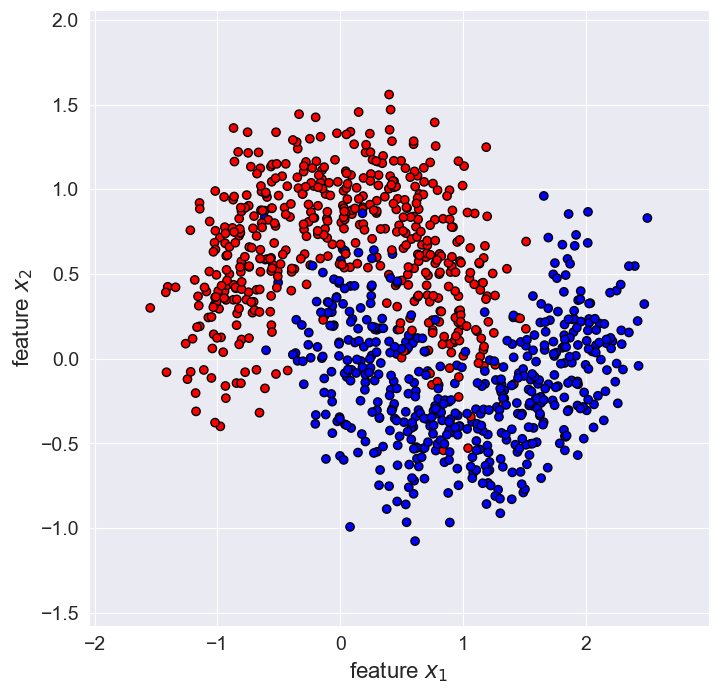

In [3]:
# a
# plotting

# choose colormap
from matplotlib.colors import ListedColormap
cm_data = ListedColormap(['#ff0000', '#0000ff'])

# determine plot boundaries
x1_min = X[:, 0].min() - .5
x1_max = X[:, 0].max() + .5
x2_min = X[:, 1].min() - .5
x2_max = X[:, 1].max() + .5

plt.figure(figsize=(8, 8))

# plot the points
plt.scatter(X[:, 0], X[:, 1], c=y, cmap=cm_data, edgecolors="k")

# Labels
plt.xlabel('feature $x_1$', size=16)
plt.ylabel('feature $x_2$', size=16)

# apply boundaries
plt.xlim(x1_min, x1_max)
plt.ylim(x2_min, x2_max)

plt.show()

In [4]:
# b
# split into training and test data
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=.5)

In [5]:
# c
# KNN models
from sklearn import neighbors

# training
knn_clfs = [neighbors.KNeighborsClassifier(n_neighbors=n) for n in {1,20,140}]
for clf in knn_clfs:
    clf.fit(X_train, y_train)

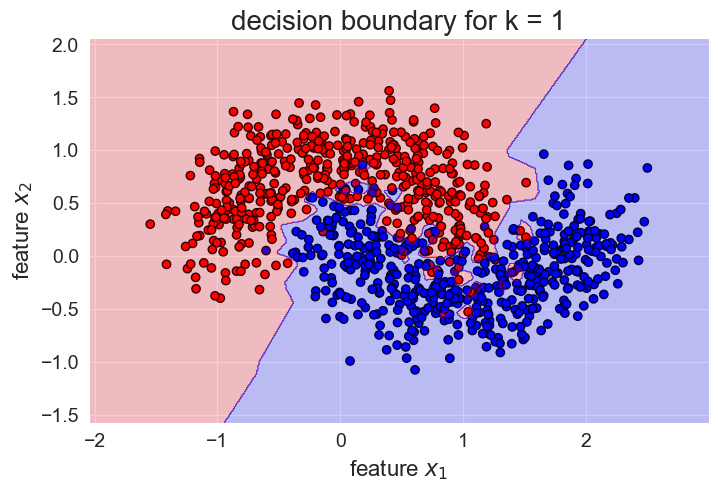

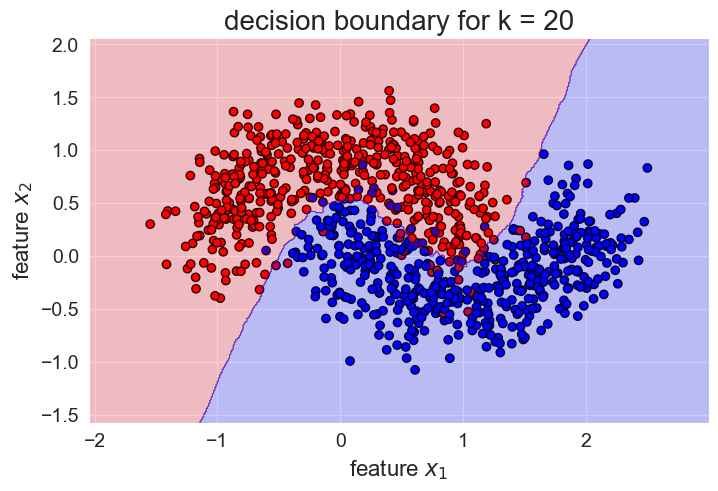

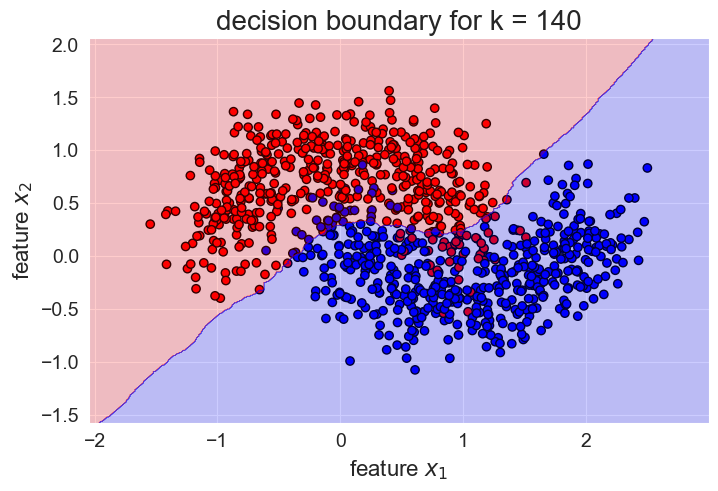

In [6]:
# d
# create a mesh of size [x1_min, x1_max] x [x2_min, x2_max].
h = .01  # step size in the mesh
xx, yy = np.meshgrid(np.arange(x1_min, x1_max, h), np.arange(x2_min, x2_max, h))

# function for plotting decision boundary
def show_bound (knn_clf):

    # assign predictions to each mesh point
    z = knn_clf.predict(np.c_[xx.ravel(), yy.ravel()])
    z = z.reshape(xx.shape)

    # plot the result
    plt.figure(figsize=(8, 5))

    # data
    plt.scatter(X[:, 0], X[:, 1], c=y, cmap=cm_data, edgecolors="k")

    # boundary
    plt.contourf(xx, yy, z, cmap=cm_data, alpha=.2)

    plt.xlabel('feature $x_1$', size=16)
    plt.ylabel('feature $x_2$', size=16)

    plt.xlim(x1_min, x1_max)
    plt.ylim(x2_min, x2_max)


show_bound(knn_clfs[0])
plt.title("decision boundary for k = 1", size=20)
plt.show()
show_bound(knn_clfs[1])
plt.title("decision boundary for k = 20", size=20)
plt.show()
show_bound(knn_clfs[2])
plt.title("decision boundary for k = 140", size=20)
plt.show()

In [7]:
# e
from sklearn.metrics import mean_squared_error

# create k = 1...140
ks = np.arange(1, 141, 1)

m_train = []
m_test = []

for k in ks:
    # train the model
    knn_clf = neighbors.KNeighborsClassifier(n_neighbors=k)
    knn_clf.fit(X_train, y_train)

    # given classification predictions are 1 or 0, 1 - accuracy is mse
    m_train.append(mean_squared_error(y_train, knn_clf.predict(X_train)))
    m_test.append(mean_squared_error(y_test, knn_clf.predict(X_test)))

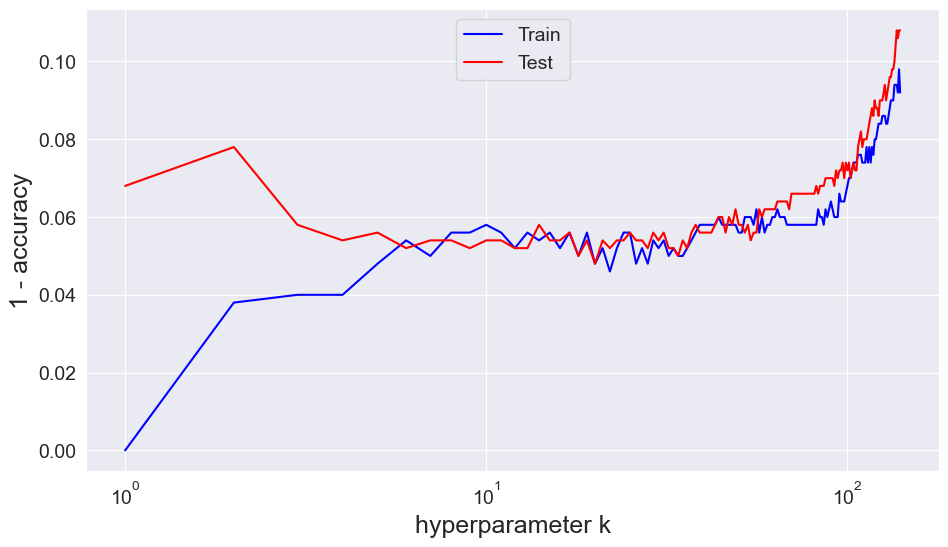

In [8]:
# e
# Plotting 1 - accuracy
plt.figure(figsize=(11,6))
plt.semilogx(ks, m_train, 'b',label='Train')
plt.semilogx(ks, m_test, 'r',label='Test')

plt.legend(loc='upper center',fontsize=14)
plt.xlabel('hyperparameter k')
plt.ylabel('1 - accuracy')

plt.show()

**(f)** k=1
This is where the model shows the greatest sign of overfitting

## 3) Participate in the Kaggle Titanic Machine Learning Challenge
**(4.5 points total)**

[Kaggle](https://en.wikipedia.org/wiki/Kaggle) is a platform that hosts machine learning competitions, notebooks, and datasets. This exercise will get you started with participating in Kaggle competitions, a skill you will need in week four of this course. 

**(a)**  Create an account on Kaggle and sent me your username via email. Your username has to be either your real name, your netid, or a pseudonym you sent him via email _before_ you open the account. If you already have a Kaggle account, you probably will have trouble to open a second one $\rightarrow$ sent me an email. (0.5 points)

Then participate in the [Titanic: Machine Learning from Disaster](https://www.kaggle.com/c/titanic/overview) competition. Download the test and training data from there.

[This video](https://www.youtube.com/watch?v=8yZMXCaFshs) can help you getting started. It's fine to get inspiration from existing notebooks. However, remember the copy fragments, not solutions policy. You need to write your Python code.  

**(b)**  Write a notebook that uses logistic regression, at least three different features, and 3 fold cross-validation. What is the accuracy? (1.5 points)

**(c)**  Use GridSearchCV to determine the best L2 regularization strength (switched on by default, hyperparameter: C ) Then make a prediction for the test data set. (1.5 points)

**(d)**  Make a submission of your test data prediction to the Titanic contest and document it with a screenshot of your position at the leaderboard. Your Ranking does not matter. Besides the notebook containing your code you need to submit that image to Sakai. (1 point)

**ANSWER**